In this notebook we look into the Big Mart sales data downloaded from analytics vidhya. We will try tp predict the sales of each item in each outlet of Big Mart, using linear regression algorithm after doing extensive data cleaning and visual data exploration

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the data
train = pd.read_csv('train_BM.csv')
test = pd.read_csv('test_BM.csv')

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
#check for null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#filling null entries with the mean value for that item category
for i in train.index:
    if train.iloc[i].isnull()['Item_Weight'] == True:
        com = train['Item_Identifier'].iloc[i]
        fill = train[train['Item_Identifier']==com]['Item_Weight'].mean()
        train['Item_Weight'].iloc[i] = fill

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
#filling null entries with the mean value for that outlet category

for i in train.index:
    if train.iloc[i].isnull()['Outlet_Size'] == True:
        com = train['Outlet_Identifier'].iloc[i]
        fill = train[train['Outlet_Identifier']==com]['Outlet_Size'].mean()
        train['Outlet_Size'].iloc[i] = fill

In [14]:
#Show percentage of null values in each column
nullvs = pd.DataFrame(data={'null':train.isnull().sum(), 'null_pct':train.isnull().sum()*100/len(train)})
nullvs.index = train.columns
nullvs

,null,null_pct
Item_Identifier,0,0.000000
Item_Weight,4,0.046932
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


The above dataframe shows the percentage of null values in each column. For now we will get rid of any column that has more than 25% of its values as NaN.
'Outlet_Size' is the only feature that has a null value count of more than 25%. Let's drop that column.
In addition to that we will also drop the 'Item_Identifier' and 'Outlet_Identifier' column since they are irrelevant to us when it comes to running regression algorithm

In [15]:
#removing irrelavant columns
train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Size'], axis=1, inplace=True)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,Tier 3,Supermarket Type1,343.5528
7,19.000,Low Fat,0.127470,Snack Foods,107.7622,1985,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,Tier 2,Supermarket Type1,4710.5350


In [16]:
#dropping rows with null values
train = train.dropna()

### Cleaning of categorical columns

In [17]:
cat_cols = train.select_dtypes(include=['object']).columns
unq = {}
for i in cat_cols:
    unq[i] = train[i].unique()
    
unq

{'Item_Fat_Content': array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 'Item_Type': array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
        'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
        'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
        'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object),
 'Outlet_Location_Type': array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object),
 'Outlet_Type': array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object)}

In [20]:
train['Item_Fat_Content'] =train['Item_Fat_Content'].replace('low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [21]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Low fat'], dtype=object)

### Visual data exploration

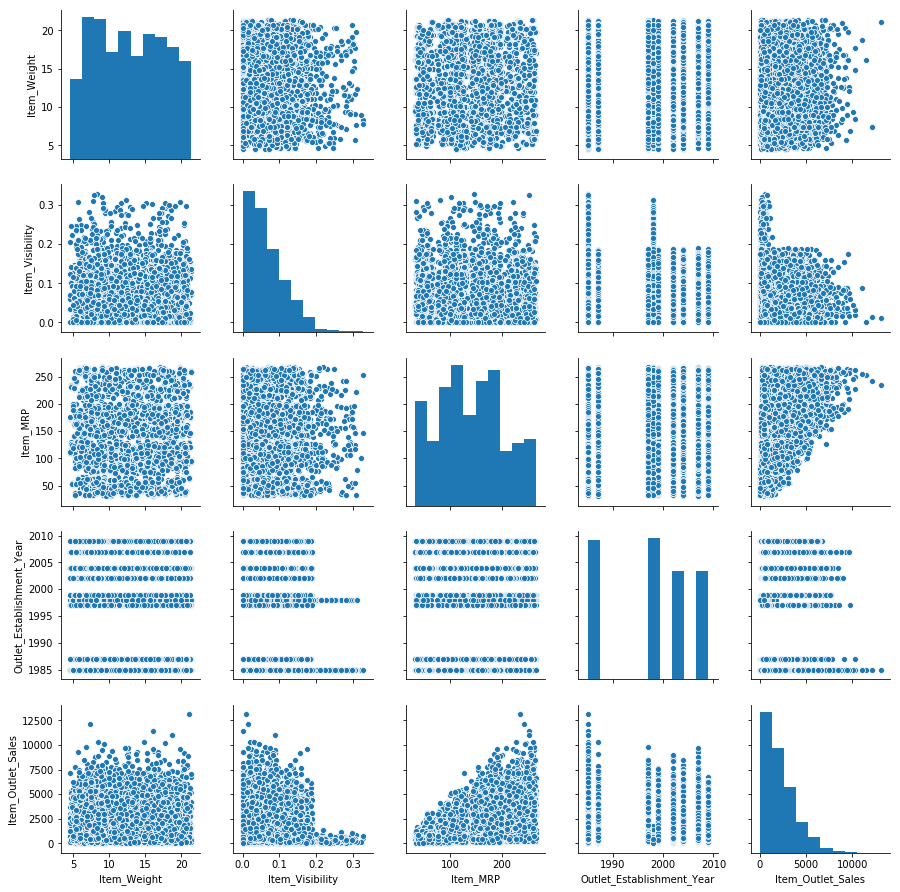

In [23]:
import seaborn as sns
%matplotlib inline
sns.pairplot(train)
plt.show()

In [24]:
#creating dummy variables for categorical columns
text_cols = train.select_dtypes(include=['object']).columns
for col in text_cols:
    dum = pd.get_dummies(train[col])
    train = pd.concat([train, dum], axis=1)
    del train[col]

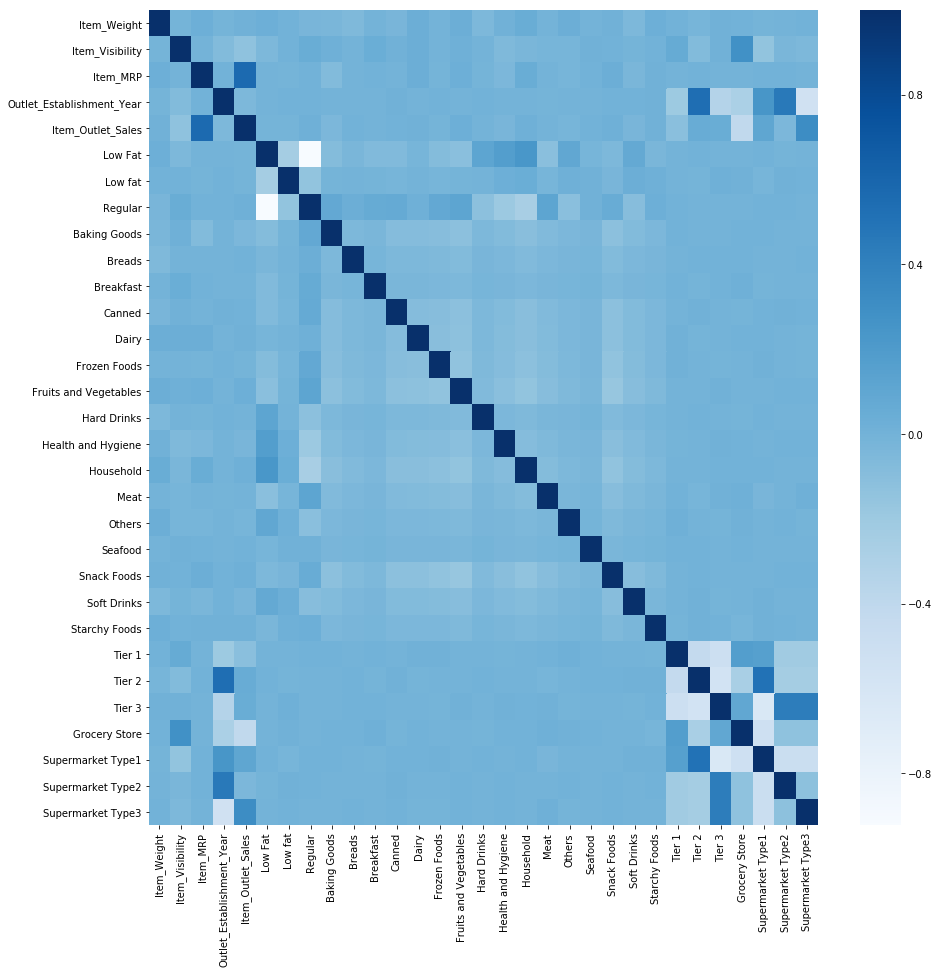

In [28]:
#Checking corelation of features
cor_matrix = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor_matrix, cmap='Blues')

### Feature selection

In [29]:


from sklearn.linear_model import LinearRegression
avg_rmses = {}
features = {}
for i in [1,2,3,4,5,6]:

    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    x, y = train, train['Item_Outlet_Sales']
    selector = SelectKBest(f_regression, k=i)
    x_new = selector.fit_transform(x,y)
    train_features = train.columns[selector.get_support()]
    features[i] = train_features
    
    from sklearn.model_selection import cross_val_score, KFold
    kf = KFold(4, shuffle=True, random_state=None)
    lr=LinearRegression()
    mses = cross_val_score(lr, train[train_features], train['Item_Outlet_Sales'])
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = rmses.mean()
    
    avg_rmses[i] = avg_rmse

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarn

In [31]:
avg_rmses

{1: 0.5674807272743573,
 2: 0.6994929514574612,
 3: 0.7469925012543855,
 4: 0.7469344897404762,
 5: 0.7469141020666047,
 6: 0.7490705735848479}

In [32]:
features

{1: Index(['Item_MRP'], dtype='object'),
 2: Index(['Item_MRP', 'Grocery Store'], dtype='object'),
 3: Index(['Item_MRP', 'Grocery Store', 'Supermarket Type3'], dtype='object'),
 4: Index(['Item_Visibility', 'Item_MRP', 'Grocery Store', 'Supermarket Type3'], dtype='object'),
 5: Index(['Item_Visibility', 'Item_MRP', 'Tier 1', 'Grocery Store',
        'Supermarket Type3'],
       dtype='object'),
 6: Index(['Item_Visibility', 'Item_MRP', 'Tier 1', 'Grocery Store',
        'Supermarket Type1', 'Supermarket Type3'],
       dtype='object')}

### Exploring the test set

In [33]:
#exploring the test set
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [34]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [35]:
# Cleaning the test dataset

for i in test.index:
    if test.iloc[i].isnull()['Item_Weight'] == True:
        com = test['Item_Identifier'].iloc[i]
        fill = test[test['Item_Identifier']==com]['Item_Weight'].mean()
        test['Item_Weight'].iloc[i] = fill
        
for i in test.index:
    if test.iloc[i].isnull()['Outlet_Size'] == True:
        com = test['Outlet_Identifier'].iloc[i]
        fill = test[test['Outlet_Identifier']==com]['Outlet_Size'].mean()
        test['Outlet_Size'].iloc[i] = fill
        
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Size'], axis=1, inplace=True)
test = test.dropna()

text_cols = test.select_dtypes(include=['object']).columns
for col in text_cols:
    dum = pd.get_dummies(test[col])
    test = pd.concat([test, dum], axis=1)
    del test[col]

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Applying the linear regression model

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train[features[1]], train['Item_Outlet_Sales'])
predictions = lr.predict(test[features[1]])

In [37]:
predictions

array([1665.499377  , 1345.91582214, 3748.48644247, ..., 1834.79042027,
       3326.38673599, 1228.86607382])